# Summary Statistic Dimensionality

In [2]:
import ABC
import numpy as np
from Models import LinearModel, SIRModel
from scipy import stats
from sys import maxsize

# silence warnings about dodgy division
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
# print results
def print_results(results,num_stats=None):
    used=[]
    n=len(results)
    for x in returned_stats:
        if x not in used:
            used.append(x)
            print("([{}],{:.2f}%)".format(",".join([str(y) for y in x]),100*(returned_stats.count(x)/n)))
            
    if (num_stats):
        for i in range(num_stats):
            print("(ss_{},{:.2f}%)".format(i,100*(sum(i in row for row in returned_stats)/n)))

In [4]:
def mse(obs_1,obs_2):
    n_obs=len(obs_1)
    if (len(obs_2)!=n_obs): raise ValueError("obs_1 and obs_2 must have same dimension")
    sse=sum([(obs_1[i]-obs_2[i])**2 for i in range(n_obs)])
    return sse/n_obs

In [5]:
# SIR model
sir_model=SIRModel(
    params=[100000,100,1,.5],
    n_obs=30,
    x_obs=[[x] for x in range(30)],)
sir_priors=[stats.uniform(100000,0),stats.uniform(100,0),stats.uniform(0,1.5),stats.uniform(0,2)]
param_bounds=[(100000,100000),(100,100),(0,1.5),(0,2)]

In [6]:
# SUMMARY STATISTICS
# logs taken so on similar scale
final_susceptible_ss=(lambda ys:[2*np.log(ys[-1][0])]) # size of final populations
final_infectious_ss=(lambda ys:[3*np.log(ys[-1][1])])
final_removed_ss=(lambda ys:[1.5*np.log(ys[-1][2])])

peak_infections_date_ss=(lambda ys:[ys.index(max(ys,key=lambda y:y[1]))]) # date of peak infectious size
peak_infections_value_ss=(lambda ys:[1.5*np.log(max(ys,key=lambda y:y[1])[1])]) # peak infectious population size

net_weekly_susceptible_ss=(lambda ys:[.5*np.log(abs(ys[i][0]-ys[i-7][0])) for i in range(7,len(ys)-1,7)]) # weekly change in susceptible (dim=3)
net_weekly_infections_ss=(lambda ys:[.5*np.log(abs(ys[i][1]-ys[i-7][1])) for i in range(7,len(ys)-1,7)]) # weekly change in infections (dim=3)
net_weekly_removed_ss=(lambda ys:[.5*np.log(abs(ys[i][2]-ys[i-7][2])) for i in range(7,len(ys)-1,7)])

net_daily_susceptible_ss=(lambda ys:[0.08*np.log(abs(ys[i+1][0]-ys[i][0])) for i in range(0,len(ys)-1)]) # daily change in susceptible (dim=29)
net_daily_infections_ss=(lambda ys:[0.1*np.log(abs(ys[i+1][1]-ys[i][1])) for i in range(0,len(ys)-1)]) # daily change in infections (dim=29)
net_daily_removed_ss=(lambda ys:[0.08*np.log(abs(ys[i+1][2]-ys[i][2])) for i in range(0,len(ys)-1)])

mean_susceptible_ss=(lambda ys:[1.6*np.log(np.mean([y[0] for y in ys]))])
mean_infectious_ss=(lambda ys:[2*np.log(np.mean([y[1] for y in ys]))])
mean_removed_ss=(lambda ys:[1.6*np.log(np.mean([y[2] for y in ys]))])

rand=(lambda ys:[stats.uniform(0,19).rvs(1)[0]]) # random

summary_stats=[final_susceptible_ss,final_infectious_ss,final_removed_ss, #0,1,2
                peak_infections_date_ss,peak_infections_value_ss, # 3,4
                net_weekly_susceptible_ss,net_weekly_infections_ss,net_weekly_removed_ss, #5,6,7
                net_daily_susceptible_ss,net_daily_infections_ss,net_daily_removed_ss, #8,9,10
                mean_susceptible_ss,mean_infectious_ss,mean_removed_ss, #11,12,13
                rand,] #14

summary_stats_size_one=[final_susceptible_ss,final_infectious_ss,final_removed_ss, #0,1,2
                peak_infections_date_ss,peak_infections_value_ss, #3,4
                mean_susceptible_ss,mean_infectious_ss,mean_removed_ss, #5,6,7
                rand,]#8

good_summary_stats_size_one=[final_susceptible_ss,final_removed_ss, #0,1
                peak_infections_value_ss, # 2,3
                mean_susceptible_ss,mean_infectious_ss,mean_removed_ss, #4,5,6
                ]

summary_stats_size_four=[net_weekly_susceptible_ss,net_weekly_infections_ss,net_weekly_removed_ss,]

summary_stats_size_tweenty_nine=[net_daily_susceptible_ss,net_daily_infections_ss,net_daily_removed_ss,]

In [6]:
%%time
# SIR model
returned_stats=[]
n_tests=50

for i in range(n_tests):
    print("{}/{} ".format(i,n_tests),end="")
    print(returned_stats,end="\r")
    best_stats=ABC.joyce_marjoram(summary_stats_size_one,n_obs=30,y_obs=sir_model.observe(),fitting_model=sir_model.copy([1,1,1,1]),priors=sir_priors,param_bounds=param_bounds,BANDWIDTH=.5,n_samples=10000,n_bins=10,distance_measure=ABC.log_l2_norm,printing=False)
    returned_stats.append(best_stats)

print("\n\nResults")
print_results(returned_stats)

49/50 [[3], [2], [0], [0], [0], [3], [0], [1], [0], [1], [2], [1], [2], [4], [1], [0], [2], [2], [1], [0], [3], [0], [2], [3], [1], [0], [0], [2], [1], [0], [3], [3], [3], [3], [2], [3], [3], [0], [3], [2], [0], [3], [0], [1], [1], [3], [3], [0], [2]]

Results
([3],28.00%)
([2],22.00%)
([0],30.00%)
([1],18.00%)
([4],2.00%)
Wall time: 12min 30s


In [6]:
%%time
# SIR model
returned_stats=[]
n_tests=25

for i in range(n_tests):
    print("{}/{} ".format(i,n_tests),end="")
    print(returned_stats,end="\r")
    best_stats,_=ABC.two_step_minimum_entropy(summary_stats=good_summary_stats_size_one,n_obs=30,y_obs=sir_model.observe(),fitting_model=sir_model.copy([1,1,1,1]),priors=sir_priors,printing=False)
    returned_stats.append(best_stats)

print("\n\nResults")
print_results(returned_stats)

24/25 [(1, 4), (4, 5), (1, 4), (2, 4, 5), (2, 4, 5), (0, 1, 4, 5), (2, 4, 5), (1, 4), (4, 5), (3, 4, 5), (4, 5), (4, 5), (1, 2, 3, 4, 5), (1, 4), (1, 2, 4, 5), (0, 3, 4, 5), (1, 3, 4), (4, 5), (0, 1, 3, 4, 5), (1, 4, 5), (1, 4, 5), (1, 4), (1, 2, 3, 4, 5), (3, 4, 5)]

Results
([1,4],20.00%)
([4,5],20.00%)
([2,4,5],12.00%)
([0,1,4,5],4.00%)
([3,4,5],8.00%)
([1,2,3,4,5],8.00%)
([1,2,4,5],4.00%)
([0,3,4,5],4.00%)
([1,3,4],4.00%)
([0,1,3,4,5],4.00%)
([1,4,5],12.00%)
Wall time: 17min 44s


In [ ]:
%%time
returned_stats=[]
n_tests=50

for i in range(n_tests):
    print("{}/{} ".format(i,n_tests),end="")
    print(returned_stats,end="\r")
    best_stats,_=ABC.minimum_entropy(good_summary_stats_size_one,n_obs=30,y_obs=sir_model.observe(),fitting_model=sir_model.copy([1,1,1,1]),priors=sir_priors,n_samples=10000,n_accept=1000,
                                     min_subset_size=1,max_subset_size=3,printing=False)
    returned_stats.append(best_stats)

print("\n\nResults")
print_results(returned_stats,len(summary_stats_size_one))

In [22]:
def mse_summary_stats(summary_stats):
    sir_smc_priors=[stats.uniform(100000,1),stats.uniform(100,1),stats.uniform(0.5,1.5),stats.uniform(0,.8)]

    total_error=0
    n_runs=5
    for i in range(n_runs):
        print("({})".format(i),end=" ")

        fitted_model,_=ABC.adaptive_abc_smc(n_obs=30,y_obs=sir_model.observe(),
            fitting_model=sir_model.copy([1,1,1,1]),priors=sir_smc_priors,
            max_steps=100,sample_size=50,max_simulations=5000,
            acceptance_kernel=ABC.uniform_kernel,alpha=.9,
            summary_stats=summary_stats,
            distance_measure=ABC.log_l2_norm,show_plots=False,printing=False)

        flat_obs_1=[x for row in fitted_model.observe() for x in row]
        flat_obs_2=[x for row in sir_model.observe() for x in row]

        new_e=mse(flat_obs_1,flat_obs_2)
        total_error+=new_e

        print("{:,.2f} ({:,.2f})".format(new_e,total_error/(i+1)))

    print("\nTotal={:,.2f}".format(total_error/n_runs))
    return total_error/n_runs

In [34]:
%%time
# 1 D
mse_summary_stats([mean_susceptible_ss])

(0) *********************************1010080.32 (1,010,080.32)
(1) *******************************4913110.93 (2,961,595.62)
(2) ****************************1130668.84 (2,351,286.70)
(3) **********************************21613.39 (1,768,868.37)
(4) *********************************4719103.27 (2,358,915.35)

Total=2,358,915.35
Wall time: 21min 44s


2358915.350440626

In [12]:
%%time
# 2 D
#TODO
mse_summary_stats([mean_infectious_ss,mean_removed_ss])

(0) ************************************************************4,644,529.88 (4,644,529.88)
(1) ************************************************************433,464.20 (2,538,997.04)
(2) ************************************************************1,135,852.87 (2,071,282.32)
(3) *************************************************************2,751,577.11 (2,241,356.02)
(4) ************************************************************205,960.27 (1,834,276.87)

Total=1,834,276.87
Wall time: 43min 6s


1834276.8669710532

In [13]:
%%time
# 3 D
#TODO
mse_summary_stats([final_removed_ss,mean_susceptible_ss,mean_infectious_ss])

(0) ************************************************************501,333.98 (501,333.98)
(1) *************************************************************406,093.67 (453,713.83)
(2) ************************************************************2,654,388.90 (1,187,272.19)
(3) ************************************************************2,600,792.76 (1,540,652.33)
(4) ************************************************************3,514,220.82 (1,935,366.03)

Total=1,935,366.03
Wall time: 40min 42s


1935366.0273007215

In [14]:
%%time
# 4 D
#TODO
mse_summary_stats([net_weekly_removed_ss])

(0) ************************************6,253,236.46 (6,253,236.46)
(1) **************************************463,275.45 (3,358,255.96)
(2) *************************************494,862.23 (2,403,791.38)
(3) **************************************2,022,244.08 (2,308,404.55)
(4) ******************************************47,174.34 (1,856,158.51)

Total=1,856,158.51
Wall time: 27min 17s


1856158.5115041162

In [15]:
%%time
# 90D
#TODO
mse_summary_stats(None)

(0) *****************************************************418,778.79 (418,778.79)
(1) *****************************************************113,407.14 (266,092.97)
(2) *****************************************************10,940.84 (181,042.26)
(3) *****************************************************50,852.32 (148,494.77)
(4) ***************************************************14,908.84 (121,777.59)

Total=121,777.59
Wall time: 34min 10s


121777.58720400941

In [16]:
%%time
# Joyce-Marjoram
#TODO
mse_summary_stats([final_susceptible_ss])

(0) ********************************************107,075,610.58 (107,075,610.58)
(1) *********************************************144,409,064.99 (125,742,337.78)
(2) ********************************************112,930,682.80 (121,471,786.12)
(3) *********************************************41,343,208.48 (101,439,641.71)
(4) **********************************************102,893,115.25 (101,730,336.42)

Total=101,730,336.42
Wall time: 29min 52s


101730336.41903594

In [18]:
%%time
# 2-Step Minimum Entropy
mse_summary_stats([peak_infections_value_ss,mean_infectious_ss,mean_removed_ss])

(0) ***********************************************************38,520.39 (38,520.39)
(1) *************************************************************851,649.73 (445,085.06)
(2) ***********************************************************43,541.31 (311,237.14)
(3) ************************************************************3,865.69 (234,394.28)
(4) ***********************************************************203,173.19 (228,150.06)

Total=228,150.06
Wall time: 41min 29s


228150.06273270267

In [29]:
%%time
summary_stats,_=ABC.abc_semi_auto(n_obs=30,y_obs=sir_model.observe(),fitting_model=sir_model.copy([1,1,1,1]),
                                  priors=sir_priors,distance_measure=ABC.log_l2_norm,n_pilot_samples=50000,n_pilot_acc=5000,n_params_sample_size=500)

Calculated posteriors from pilot.                
Generated 500 parameter sets.
Generated summary statistics
Wall time: 1min 42s


In [24]:
%%time
# Semi-Auto
mse_summary_stats(summary_stats)

(0) *********************************335,593,860.11 (335,593,860.11)
(1) *******************************768,850,345.68 (552,222,102.90)
(2) *******************************240,086,008.62 (448,176,738.14)
(3) *****************************444,848,311.32 (447,344,631.43)
(4) *******************************375,208,986.45 (432,917,502.44)

Total=432,917,502.44
Wall time: 23min 58s


432917502.4369356

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from Models import SenegalRonaData

# Size plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['figure.dpi'] = 100

In [30]:
entropy=[-9.48,-10.74,-10.59,-10.6,-10.54,-11.7]
mse=[2272479,1131712,228150,207124,198888,121777]
dims=[1,2,3,4,5,90]

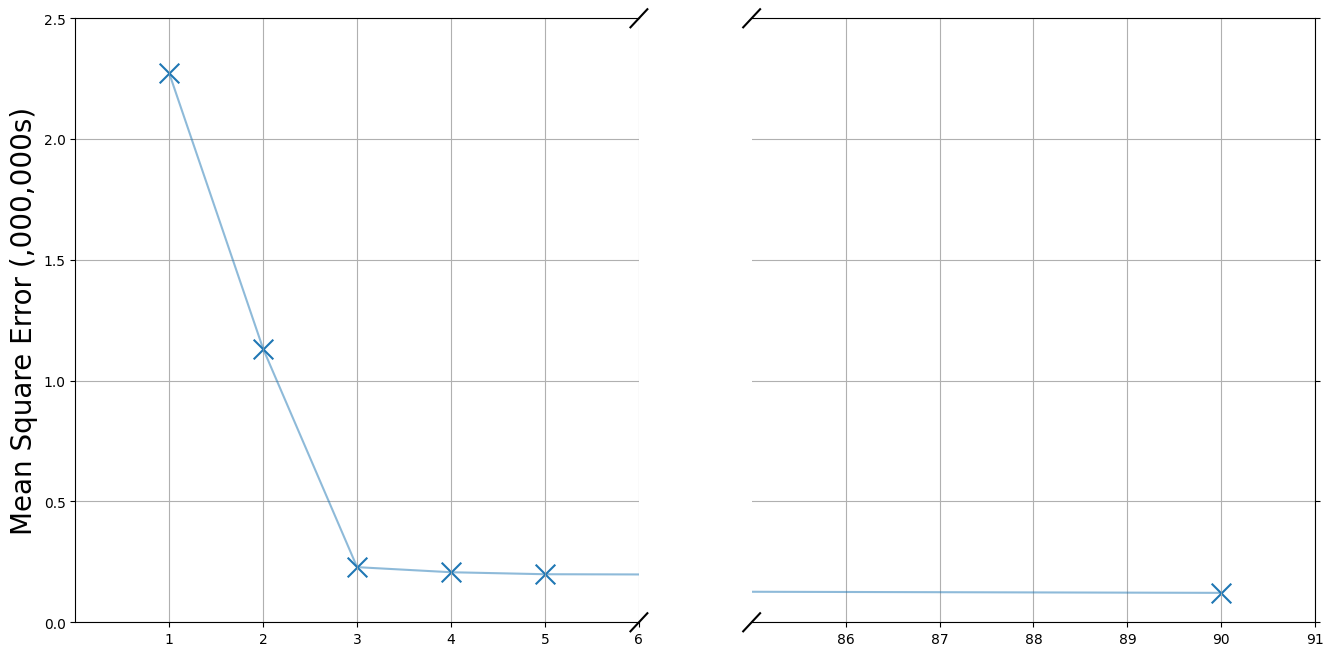

In [73]:
x = np.linspace(0,10,100)
x[75:] = np.linspace(40,42.5,25)

y = np.sin(x)

f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

# plot the same data on both axes
ax.plot(dims,mse,alpha=.5)
ax.scatter(dims,mse,marker="x",s=200)
ax2.plot(dims,mse,alpha=.5)
ax2.scatter(dims,mse,marker="x",s=200)

ax.set_xlim(0,6)
ax2.set_xlim(85,91)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.yaxis.tick_right()

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax.set_xticks([i for i in range(1,7)])
ax2.set_xticks([i for i in range(86,92)])

ax.set_ylim(0,2500000)
ax2.set_ylim(0,2500000)

y_ticks=np.linspace(0,2500000,6)
ax.set_yticks(y_ticks)
ax2.set_yticks(y_ticks)

ax.set_yticklabels(["{:.1f}".format(y/1000000) for y in y_ticks])
ax.set_ylabel("Mean Square Error (,000,000s)",fontsize=20)

ax.grid()
ax2.grid()

plt.show()